In [46]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 20})

In [47]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# County Population By Year

In [48]:
iowa_pop_temp = pd.read_csv('./data/County_Population_in_Iowa_by_Year.csv') 

In [49]:
iowa_pop_temp.head()

,FIPS,County,Year,Population,Primary Point
0,19169,Story County,July 01 2011,91136,POINT (-93.4650448 42.0362415)
1,19065,Fayette County,July 01 1995,22129,POINT (-91.8443207 42.8625919)
2,19089,Howard County,July 01 2002,9794,POINT (-92.3171989 43.3567673)
3,19007,Appanoose County,July 01 1999,13761,POINT (-92.8686104 40.7431635)
4,19043,Clayton County,July 01 2012,17946,POINT (-91.34143280000002 42.8447493)


In [50]:
iowa_pop_temp.rename(columns={'Year': 'Date', 'County': 'County_0'}, inplace=True)

In [51]:
iowa_pop_temp.head()

,FIPS,County_0,Date,Population,Primary Point
0,19169,Story County,July 01 2011,91136,POINT (-93.4650448 42.0362415)
1,19065,Fayette County,July 01 1995,22129,POINT (-91.8443207 42.8625919)
2,19089,Howard County,July 01 2002,9794,POINT (-92.3171989 43.3567673)
3,19007,Appanoose County,July 01 1999,13761,POINT (-92.8686104 40.7431635)
4,19043,Clayton County,July 01 2012,17946,POINT (-91.34143280000002 42.8447493)


In [52]:
ptemp = iowa_pop_temp['Date']
ptemp_split0 = ptemp.str.split(' ', n=- 1, expand=True)
ptemp_split = ptemp_split0.drop(ptemp_split0.columns[[1]], axis=1)

iowa_pop_temp["Year"] = ptemp_split[2]

In [53]:
ctemp = iowa_pop_temp['County_0']
ctemp_split0 = ctemp.str.split(' ', n=- 1, expand=True)
ctemp_split = ctemp_split0.drop(ctemp_split0.columns[[1]], axis=1)

iowa_pop_temp["County"] = ctemp_split[0]
iowa_pop_temp["County"] = iowa_pop_temp["County"].str.upper()
iowa_pop_temp = iowa_pop_temp.sort_values(by=['County','Year'])

In [54]:
iowa_pop_temp.head()

,FIPS,County_0,Date,Population,Primary Point,Year,County
85,19001,Adair County,April 01 1990,8409,POINT (-94.4709413 41.3307464),1990,ADAIR
715,19001,Adair County,July 01 1991,8397,POINT (-94.4709413 41.3307464),1991,ADAIR
1346,19001,Adair County,July 01 1992,8430,POINT (-94.4709413 41.3307464),1992,ADAIR
1984,19001,Adair County,July 01 1993,8441,POINT (-94.4709413 41.3307464),1993,ADAIR
2783,19001,Adair County,July 01 1994,8483,POINT (-94.4709413 41.3307464),1994,ADAIR


In [55]:
iowa_pop_temp['County'].unique()

array(['ADAIR', 'ADAMS', 'ALLAMAKEE', 'APPANOOSE', 'AUDUBON', 'BENTON',
       'BLACK', 'BOONE', 'BREMER', 'BUCHANAN', 'BUENA', 'BUTLER',
       'CALHOUN', 'CARROLL', 'CASS', 'CEDAR', 'CERRO', 'CHEROKEE',
       'CHICKASAW', 'CLARKE', 'CLAY', 'CLAYTON', 'CLINTON', 'CRAWFORD',
       'DALLAS', 'DAVIS', 'DECATUR', 'DELAWARE', 'DES', 'DICKINSON',
       'DUBUQUE', 'EMMET', 'FAYETTE', 'FLOYD', 'FRANKLIN', 'FREMONT',
       'GREENE', 'GRUNDY', 'GUTHRIE', 'HAMILTON', 'HANCOCK', 'HARDIN',
       'HARRISON', 'HENRY', 'HOWARD', 'HUMBOLDT', 'IDA', 'IOWA',
       'JACKSON', 'JASPER', 'JEFFERSON', 'JOHNSON', 'JONES', 'KEOKUK',
       'KOSSUTH', 'LEE', 'LINN', 'LOUISA', 'LUCAS', 'LYON', 'MADISON',
       'MAHASKA', 'MARION', 'MARSHALL', 'MILLS', 'MITCHELL', 'MONONA',
       'MONROE', 'MONTGOMERY', 'MUSCATINE', "O'BRIEN", 'OSCEOLA', 'PAGE',
       'PALO', 'PLYMOUTH', 'POCAHONTAS', 'POLK', 'POTTAWATTAMIE',
       'POWESHIEK', 'RINGGOLD', 'SAC', 'SCOTT', 'SHELBY', 'SIOUX',
       'STORY', 'TAMA', 'TAY

In [56]:
iowa_pop_temp.loc[iowa_pop_temp['County']=="O'BRIEN",'County']='OBRIEN'
iowa_pop_temp.loc[iowa_pop_temp['County']=="BLACK",'County']='BLACK HAWK'
iowa_pop_temp.loc[iowa_pop_temp['County']=="BUENA",'County']='BUENA VISTA'
iowa_pop_temp.loc[iowa_pop_temp['County']=="CERRO",'County']='CERRO GORDO'
iowa_pop_temp.loc[iowa_pop_temp['County']=="DES",'County']='DES MOINES'
iowa_pop_temp.loc[iowa_pop_temp['County']=="PALO",'County']='PALO ALTO'
iowa_pop_temp.loc[iowa_pop_temp['County']=="VAN",'County']='VAN BUREN'

In [57]:
iowa_pop_temp['County'].unique()

array(['ADAIR', 'ADAMS', 'ALLAMAKEE', 'APPANOOSE', 'AUDUBON', 'BENTON',
       'BLACK HAWK', 'BOONE', 'BREMER', 'BUCHANAN', 'BUENA VISTA',
       'BUTLER', 'CALHOUN', 'CARROLL', 'CASS', 'CEDAR', 'CERRO GORDO',
       'CHEROKEE', 'CHICKASAW', 'CLARKE', 'CLAY', 'CLAYTON', 'CLINTON',
       'CRAWFORD', 'DALLAS', 'DAVIS', 'DECATUR', 'DELAWARE', 'DES MOINES',
       'DICKINSON', 'DUBUQUE', 'EMMET', 'FAYETTE', 'FLOYD', 'FRANKLIN',
       'FREMONT', 'GREENE', 'GRUNDY', 'GUTHRIE', 'HAMILTON', 'HANCOCK',
       'HARDIN', 'HARRISON', 'HENRY', 'HOWARD', 'HUMBOLDT', 'IDA', 'IOWA',
       'JACKSON', 'JASPER', 'JEFFERSON', 'JOHNSON', 'JONES', 'KEOKUK',
       'KOSSUTH', 'LEE', 'LINN', 'LOUISA', 'LUCAS', 'LYON', 'MADISON',
       'MAHASKA', 'MARION', 'MARSHALL', 'MILLS', 'MITCHELL', 'MONONA',
       'MONROE', 'MONTGOMERY', 'MUSCATINE', 'OBRIEN', 'OSCEOLA', 'PAGE',
       'PALO ALTO', 'PLYMOUTH', 'POCAHONTAS', 'POLK', 'POTTAWATTAMIE',
       'POWESHIEK', 'RINGGOLD', 'SAC', 'SCOTT', 'SHELBY', 'SIOUX',


In [58]:
iowa_pop_temp['Year'].unique()

array(['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype=object)

# County Income By Year

In [59]:
iowa_income_temp = pd.read_csv('./data/Annual_Personal_Income_for_State_of_Iowa_by_County.csv') 

In [60]:
iowa_income_temp.head()

,Row ID,Geography ID,Name,Variable Code,Variable,Value,Variable Unit,Date,Location
0,19001_2020_CAINC1-1_annual,19001,"Adair, IA",CAINC1-1,Personal income,398280,Thousands of dollars,12/31/2020,POINT (-94.478164 41.328528)
1,19003_2020_CAINC1-1_annual,19003,"Adams, IA",CAINC1-1,Personal income,213735,Thousands of dollars,12/31/2020,POINT (-94.696906 41.021656)
2,19005_2020_CAINC1-1_annual,19005,"Allamakee, IA",CAINC1-1,Personal income,697196,Thousands of dollars,12/31/2020,POINT (-91.382751 43.274964)
3,19007_2020_CAINC1-1_annual,19007,"Appanoose, IA",CAINC1-1,Personal income,523611,Thousands of dollars,12/31/2020,POINT (-92.873061 40.744296)
4,19011_2020_CAINC1-1_annual,19011,"Benton, IA",CAINC1-1,Personal income,1455638,Thousands of dollars,12/31/2020,POINT (-92.05763 42.092547)


In [61]:
temp = iowa_income_temp['Date']
temp_split0 = temp.str.split('/', n=- 1, expand=True)
temp_split = temp_split0.drop(temp_split0.columns[[1]], axis=1)

iowa_income_temp["Year"] = temp_split[2]

In [62]:
temp2 = iowa_income_temp['Name']
temp2_split0 = temp2.str.split(',', n=- 1, expand=True)
temp2_split = temp2_split0.drop(temp2_split0.columns[[1]], axis=1)

iowa_income_temp["County"] = temp2_split[0]
iowa_income_temp['County'] = iowa_income_temp['County'].str.upper()

In [63]:
iowa_income_temp.head()

,Row ID,Geography ID,Name,Variable Code,Variable,Value,Variable Unit,Date,Location,Year,County
0,19001_2020_CAINC1-1_annual,19001,"Adair, IA",CAINC1-1,Personal income,398280,Thousands of dollars,12/31/2020,POINT (-94.478164 41.328528),2020,ADAIR
1,19003_2020_CAINC1-1_annual,19003,"Adams, IA",CAINC1-1,Personal income,213735,Thousands of dollars,12/31/2020,POINT (-94.696906 41.021656),2020,ADAMS
2,19005_2020_CAINC1-1_annual,19005,"Allamakee, IA",CAINC1-1,Personal income,697196,Thousands of dollars,12/31/2020,POINT (-91.382751 43.274964),2020,ALLAMAKEE
3,19007_2020_CAINC1-1_annual,19007,"Appanoose, IA",CAINC1-1,Personal income,523611,Thousands of dollars,12/31/2020,POINT (-92.873061 40.744296),2020,APPANOOSE
4,19011_2020_CAINC1-1_annual,19011,"Benton, IA",CAINC1-1,Personal income,1455638,Thousands of dollars,12/31/2020,POINT (-92.05763 42.092547),2020,BENTON


In [64]:
iowa_income_temp['Variable'].unique()

array(['Personal income', 'Per capita personal income'], dtype=object)

In [65]:
iowa_income = iowa_income_temp.loc[iowa_income_temp['Variable'] == 'Per capita personal income']

In [66]:
iowa_income = iowa_income.sort_values(by=['County','Year'])

In [67]:
iowa_income.head()

,Row ID,Geography ID,Name,Variable Code,Variable,Value,Variable Unit,Date,Location,Year,County
2494,19001_1997_CAINC1-3_annual,19001,"Adair, IA",CAINC1-3,Per capita personal income,21269,Dollars,12/31/1997,POINT (-94.478164 41.328528),1997,ADAIR
2493,19001_1998_CAINC1-3_annual,19001,"Adair, IA",CAINC1-3,Per capita personal income,22118,Dollars,12/31/1998,POINT (-94.478164 41.328528),1998,ADAIR
2492,19001_1999_CAINC1-3_annual,19001,"Adair, IA",CAINC1-3,Per capita personal income,22793,Dollars,12/31/1999,POINT (-94.478164 41.328528),1999,ADAIR
2491,19001_2000_CAINC1-3_annual,19001,"Adair, IA",CAINC1-3,Per capita personal income,25608,Dollars,12/31/2000,POINT (-94.478164 41.328528),2000,ADAIR
2490,19001_2001_CAINC1-3_annual,19001,"Adair, IA",CAINC1-3,Per capita personal income,26047,Dollars,12/31/2001,POINT (-94.478164 41.328528),2001,ADAIR


In [68]:
iowa_income['County'].unique()

array(['ADAIR', 'ADAMS', 'ALLAMAKEE', 'APPANOOSE', 'AUDUBON', 'BENTON',
       'BLACK HAWK', 'BOONE', 'BREMER', 'BUCHANAN', 'BUENA VISTA',
       'BUTLER', 'CALHOUN', 'CARROLL', 'CASS', 'CEDAR', 'CERRO GORDO',
       'CHEROKEE', 'CHICKASAW', 'CLARKE', 'CLAY', 'CLAYTON', 'CLINTON',
       'CRAWFORD', 'DALLAS', 'DAVIS', 'DECATUR', 'DELAWARE', 'DES MOINES',
       'DICKINSON', 'DUBUQUE', 'EMMET', 'FAYETTE', 'FLOYD', 'FRANKLIN',
       'FREMONT', 'GREENE', 'GRUNDY', 'GUTHRIE', 'HAMILTON', 'HANCOCK',
       'HARDIN', 'HARRISON', 'HENRY', 'HOWARD', 'HUMBOLDT', 'IDA', 'IOWA',
       'JACKSON', 'JASPER', 'JEFFERSON', 'JOHNSON', 'JONES', 'KEOKUK',
       'KOSSUTH', 'LEE', 'LINN', 'LOUISA', 'LUCAS', 'LYON', 'MADISON',
       'MAHASKA', 'MARION', 'MARSHALL', 'MILLS', 'MITCHELL', 'MONONA',
       'MONROE', 'MONTGOMERY', 'MUSCATINE', "O'BRIEN", 'OSCEOLA', 'PAGE',
       'PALO ALTO', 'PLYMOUTH', 'POCAHONTAS', 'POLK', 'POTTAWATTAMIE',
       'POWESHIEK', 'RINGGOLD', 'SAC', 'SCOTT', 'SHELBY', 'SIOUX',

In [69]:
iowa_income.loc[iowa_income['County']=="O'BRIEN",'County']='OBRIEN'

In [70]:
iowa_income['County'].unique()

array(['ADAIR', 'ADAMS', 'ALLAMAKEE', 'APPANOOSE', 'AUDUBON', 'BENTON',
       'BLACK HAWK', 'BOONE', 'BREMER', 'BUCHANAN', 'BUENA VISTA',
       'BUTLER', 'CALHOUN', 'CARROLL', 'CASS', 'CEDAR', 'CERRO GORDO',
       'CHEROKEE', 'CHICKASAW', 'CLARKE', 'CLAY', 'CLAYTON', 'CLINTON',
       'CRAWFORD', 'DALLAS', 'DAVIS', 'DECATUR', 'DELAWARE', 'DES MOINES',
       'DICKINSON', 'DUBUQUE', 'EMMET', 'FAYETTE', 'FLOYD', 'FRANKLIN',
       'FREMONT', 'GREENE', 'GRUNDY', 'GUTHRIE', 'HAMILTON', 'HANCOCK',
       'HARDIN', 'HARRISON', 'HENRY', 'HOWARD', 'HUMBOLDT', 'IDA', 'IOWA',
       'JACKSON', 'JASPER', 'JEFFERSON', 'JOHNSON', 'JONES', 'KEOKUK',
       'KOSSUTH', 'LEE', 'LINN', 'LOUISA', 'LUCAS', 'LYON', 'MADISON',
       'MAHASKA', 'MARION', 'MARSHALL', 'MILLS', 'MITCHELL', 'MONONA',
       'MONROE', 'MONTGOMERY', 'MUSCATINE', 'OBRIEN', 'OSCEOLA', 'PAGE',
       'PALO ALTO', 'PLYMOUTH', 'POCAHONTAS', 'POLK', 'POTTAWATTAMIE',
       'POWESHIEK', 'RINGGOLD', 'SAC', 'SCOTT', 'SHELBY', 'SIOUX',


In [71]:
iowa_income['Year'].unique()

array(['1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype=object)

# Iowa Counties - Shape Files

In [72]:
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [73]:
# County Boundaries Shape File
map_counties = gpd.read_file(
    './data/County Boundaries of Iowa/geo_export_b0962504-4b8e-4a81-9f03-586d790445ed.shp')

In [74]:
map_counties.rename(columns={'county_nam': 'County'}, inplace=True)
map_counties["County"] = map_counties["County"].str.upper()
map_counties = map_counties.sort_values(by=['County'])

In [75]:
map_counties.head()

,gnis_featu,fips,state_coun,County,acres,geometry
71,465190,19001,01,ADAIR,364794.8,"POLYGON ((-94.70051 41.50434, -94.68163 41.504..."
80,465191,19003,02,ADAMS,272218.7,"POLYGON ((-94.92751 41.15872, -94.91078 41.158..."
5,465192,19005,03,ALLAMAKEE,421810.2,"POLYGON ((-91.61075 43.50060, -91.61061 43.500..."
97,465193,19007,04,APPANOOSE,330047.6,"POLYGON ((-93.09759 40.89823, -93.07897 40.898..."
58,465194,19009,05,AUDUBON,283755.1,"POLYGON ((-95.09285 41.86336, -95.07302 41.863..."


In [76]:
# County Points Shape File
map_counties_pts = gpd.read_file(
    './data/Primary Points for Iowa Counties/geo_export_7ec5c31d-2f89-4961-bacf-1dbe5f7b3ed7.shp')

In [77]:
map_counties_pts.head()

,state_coun,gnis,fips,county_nam,primary_la,primary_lo,geometry
0,01,465190,19001,Adair,41.330746,-94.470941,POINT (-94.47094 41.33075)
1,02,465191,19003,Adams,41.028984,-94.699185,POINT (-94.69918 41.02898)
2,03,465192,19005,Allamakee,43.284284,-91.378092,POINT (-91.37809 43.28428)
3,04,465193,19007,Appanoose,40.743164,-92.868610,POINT (-92.86861 40.74316)
4,05,465194,19009,Audubon,41.684589,-94.905822,POINT (-94.90582 41.68459)


In [78]:
map_counties_pts.loc[map_counties_pts['county_nam']=="O'Brien",'county_nam']='OBRIEN'

In [79]:
map_counties_pts.rename(columns={'county_nam': 'County'}, inplace=True)
map_counties_pts["County"] = map_counties_pts["County"].str.upper()
map_counties_pts = map_counties_pts.sort_values(by=['County'])

In [91]:
all_counties = np.sort(map_counties_pts['County'].unique())
len(all_counties)

99

In [81]:
map_counties_pts.head()

,state_coun,gnis,fips,County,primary_la,primary_lo,geometry
0,01,465190,19001,ADAIR,41.330746,-94.470941,POINT (-94.47094 41.33075)
1,02,465191,19003,ADAMS,41.028984,-94.699185,POINT (-94.69918 41.02898)
2,03,465192,19005,ALLAMAKEE,43.284284,-91.378092,POINT (-91.37809 43.28428)
3,04,465193,19007,APPANOOSE,40.743164,-92.868610,POINT (-92.86861 40.74316)
4,05,465194,19009,AUDUBON,41.684589,-94.905822,POINT (-94.90582 41.68459)


In [82]:
data0_2015 = iowa_pop_temp.loc[iowa_pop_temp['Year'] == '2015']
data0_2016 = iowa_pop_temp.loc[iowa_pop_temp['Year'] == '2016']
data0_2017 = iowa_pop_temp.loc[iowa_pop_temp['Year'] == '2017']
data0_2018 = iowa_pop_temp.loc[iowa_pop_temp['Year'] == '2018']
data0_2019 = iowa_pop_temp.loc[iowa_pop_temp['Year'] == '2019']
data0_2020 = iowa_pop_temp.loc[iowa_pop_temp['Year'] == '2020']

pop_2015 = []
pop_2016 = []
pop_2017 = []
pop_2018 = []
pop_2019 = []
pop_2020 = []

for k in all_counties:  
    pop_2015 = np.append(pop_2015, 
                data0_2015.loc[data0_2015['County'] == k,'Population'])
    
    pop_2016 = np.append(pop_2016, 
                data0_2016.loc[data0_2016['County'] == k, 'Population'])
    
    pop_2017 = np.append(pop_2017, 
                data0_2017.loc[data0_2017['County'] == k, 'Population'])
    
    pop_2018 = np.append(pop_2018, 
                data0_2018.loc[data0_2018['County'] == k, 'Population'])
        
    pop_2019 = np.append(pop_2019, 
                data0_2019.loc[data0_2019['County'] == k, 'Population'])
        
    pop_2020 = np.append(pop_2020, 
                data0_2020.loc[data0_2020['County'] == k, 'Population'])

map_counties_pts['Population_2015'] = pop_2015
map_counties_pts['Population_2016'] = pop_2016
map_counties_pts['Population_2017'] = pop_2017
map_counties_pts['Population_2018'] = pop_2018
map_counties_pts['Population_2019'] = pop_2019
map_counties_pts['Population_2020'] = pop_2020

In [83]:
data0_2020.groupby(['County']).mean().sort_values('Population', ascending=False)

,FIPS,Population
County,,
POLK,19153,492401
LINN,19113,230299
SCOTT,19163,174669
JOHNSON,19103,152854
BLACK HAWK,19013,131144
WOODBURY,19193,105941
DALLAS,19049,99678
DUBUQUE,19061,99266
STORY,19169,98537


In [84]:
data_2015 = iowa_income.loc[iowa_income['Year'] == '2015']
data_2016 = iowa_income.loc[iowa_income['Year'] == '2016']
data_2017 = iowa_income.loc[iowa_income['Year'] == '2017']
data_2018 = iowa_income.loc[iowa_income['Year'] == '2018']
data_2019 = iowa_income.loc[iowa_income['Year'] == '2019']
data_2020 = iowa_income.loc[iowa_income['Year'] == '2020']

income_2015 = []
income_2016 = []
income_2017 = []
income_2018 = []
income_2019 = []
income_2020 = []

for k in all_counties:  
    income_2015 = np.append(income_2015, 
                data_2015.loc[data_2015['County'] == k, 'Value'])
    
    income_2016 = np.append(income_2016, 
                data_2016.loc[data_2016['County'] == k, 'Value'])
    
    income_2017 = np.append(income_2017, 
                data_2017.loc[data_2017['County'] == k, 'Value'])
    
    income_2018 = np.append(income_2018, 
                data_2018.loc[data_2018['County'] == k, 'Value'])
        
    income_2019 = np.append(income_2019, 
                data_2019.loc[data_2019['County'] == k, 'Value'])
        
    income_2020 = np.append(income_2020, 
                data_2020.loc[data_2020['County'] == k, 'Value'])

map_counties_pts['Income_perCapita_2015'] = income_2015
map_counties_pts['Income_perCapita_2016'] = income_2016
map_counties_pts['Income_perCapita_2017'] = income_2017
map_counties_pts['Income_perCapita_2018'] = income_2018
map_counties_pts['Income_perCapita_2019'] = income_2019
map_counties_pts['Income_perCapita_2020'] = income_2020

In [85]:
data_2020.groupby(['County']).mean().sort_values('Value', ascending=False)

,Geography ID,Value
County,,
DALLAS,19049,70851
DICKINSON,19059,63319
MITCHELL,19131,62037
CHEROKEE,19035,60881
MILLS,19129,60384
SAC,19161,59653
ADAMS,19003,59569
WASHINGTON,19183,59565
CHICKASAW,19037,59495


In [86]:
map_counties_pts.head()

,state_coun,gnis,fips,County,primary_la,primary_lo,geometry,Population_2015,Population_2016,Population_2017,Population_2018,Population_2019,Population_2020,Income_perCapita_2015,Income_perCapita_2016,Income_perCapita_2017,Income_perCapita_2018,Income_perCapita_2019,Income_perCapita_2020
0,01,465190,19001,ADAIR,41.330746,-94.470941,POINT (-94.47094 41.33075),7145.0,7005.0,7051.0,7074.0,7152.0,7496.0,47125.0,46541.0,48748.0,51910.0,51911.0,56422.0
1,02,465191,19003,ADAMS,41.028984,-94.699185,POINT (-94.69918 41.02898),3754.0,3692.0,3657.0,3644.0,3602.0,3704.0,69383.0,63500.0,59637.0,60013.0,57401.0,59569.0
2,03,465192,19005,ALLAMAKEE,43.284284,-91.378092,POINT (-91.37809 43.28428),13874.0,13851.0,13803.0,13852.0,13687.0,14061.0,44927.0,44249.0,44785.0,46440.0,48046.0,51107.0
3,04,465193,19007,APPANOOSE,40.743164,-92.868610,POINT (-92.86861 40.74316),12577.0,12505.0,12353.0,12401.0,12426.0,12317.0,35280.0,35610.0,37499.0,38183.0,38918.0,42125.0
4,05,465194,19009,AUDUBON,41.684589,-94.905822,POINT (-94.90582 41.68459),5711.0,5626.0,5550.0,5471.0,5496.0,5674.0,44210.0,43163.0,46419.0,50456.0,51186.0,54313.0


In [87]:
# Digging into the discrepancies 
temp2 = list(map_counties_pts['County'].unique())
temp1 = list(data0_2019['County'].unique())
s = set(temp2)
temp3 = [x for x in temp1 if x not in s]
temp3

[]

# Map Stuff

Text(0.5, 1.0, '2020 Population By County')

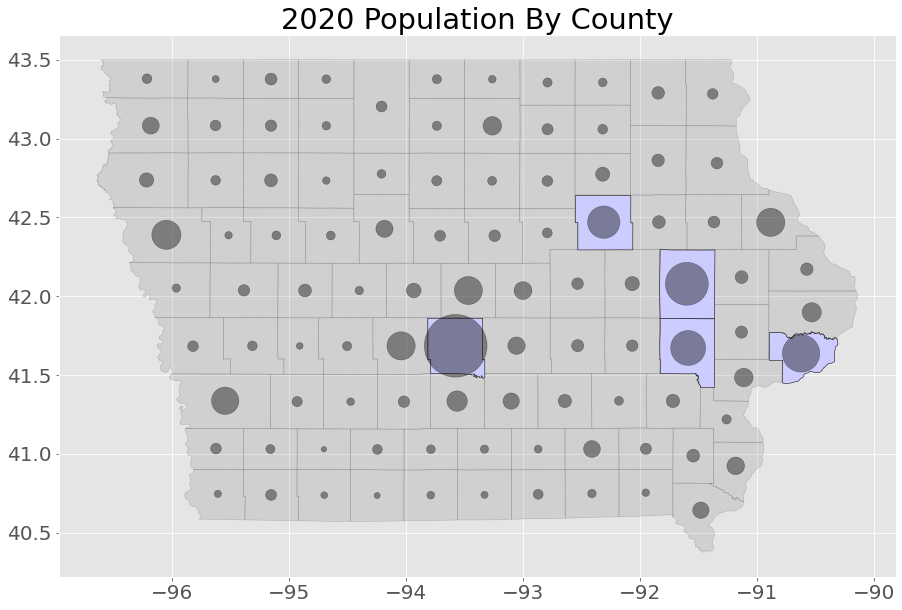

In [88]:
markersize = map_counties_pts['Population_2020']/125

fig,ax = plt.subplots(figsize = (15,15))

# County Boundaries
map_counties.to_crs(epsg=4326).plot(ax = ax, alpha=0.2, color="gray",edgecolor='black')

map_counties[map_counties['County']=='POLK'].to_crs(epsg=4326).plot(
    ax = ax, alpha=1, color="#CCCCFF",edgecolor='black')
map_counties[map_counties['County']=='LINN'].to_crs(epsg=4326).plot(
    ax = ax, alpha=1, color="#CCCCFF",edgecolor='black')
map_counties[map_counties['County']=='SCOTT'].to_crs(epsg=4326).plot(
    ax = ax, alpha=1, color="#CCCCFF",edgecolor='black')
map_counties[map_counties['County']=='JOHNSON'].to_crs(epsg=4326).plot(
    ax = ax, alpha=1, color="#CCCCFF",edgecolor='black')
map_counties[map_counties['County']=='BLACK HAWK'].to_crs(epsg=4326).plot(
    ax = ax, alpha=1, color="#CCCCFF",edgecolor='black')

map_counties_pts.plot(ax = ax, color="black",markersize=markersize, alpha=0.40)
ax.set_title('2020 Population By County')


Text(0.5, 1.0, '2020 Income per Capita By County')

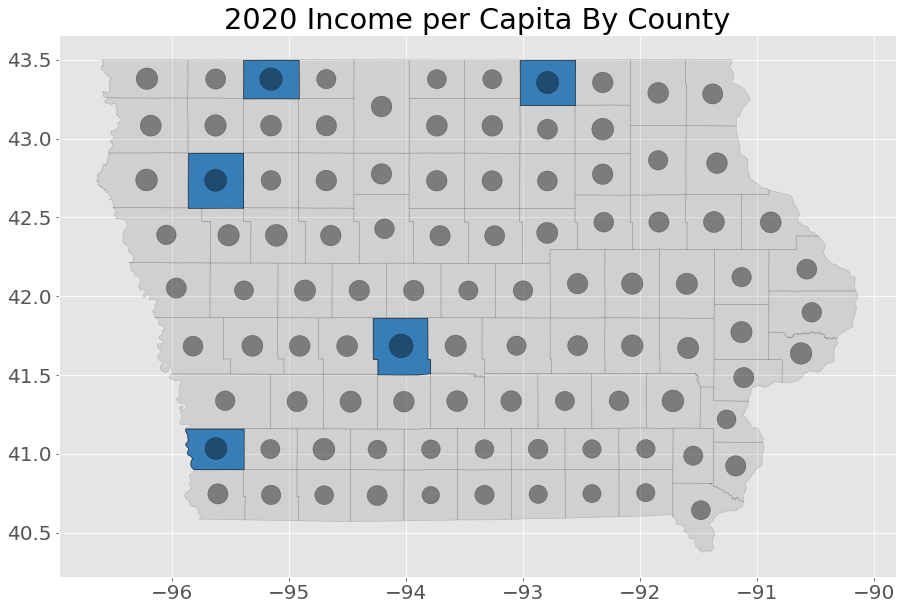

In [90]:
markersize = map_counties_pts['Income_perCapita_2020']/125

fig,ax = plt.subplots(figsize = (15,15))

# County Boundaries
map_counties.to_crs(epsg=4326).plot(ax = ax, alpha=0.2, color="gray",edgecolor='black')

map_counties[map_counties['County']=='DALLAS'].to_crs(epsg=4326).plot(
    ax = ax, alpha=1, color="#377eb8",edgecolor='black')
map_counties[map_counties['County']=='DICKINSON'].to_crs(epsg=4326).plot(
    ax = ax, alpha=1, color="#377eb8",edgecolor='black')
map_counties[map_counties['County']=='MITCHELL'].to_crs(epsg=4326).plot(
    ax = ax, alpha=1, color="#377eb8",edgecolor='black')
map_counties[map_counties['County']=='CHEROKEE'].to_crs(epsg=4326).plot(
    ax = ax, alpha=1, color="#377eb8",edgecolor='black')
map_counties[map_counties['County']=='MILLS'].to_crs(epsg=4326).plot(
    ax = ax, alpha=1, color="#377eb8",edgecolor='black')

map_counties_pts.plot(ax = ax, color="black",markersize=markersize, alpha=0.40)
ax.set_title('2020 Income per Capita By County')